In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from pprint import pprint
import copy
import operator
import math
from sklearn import metrics

In [19]:
df = pd.read_csv("adm_data.csv")
train_df=df.sample(frac=0.8,random_state=200)
test_df=df.drop(train_df.index)
train_label = train_df['Chance of Admit ']
train_df = train_df.drop('Chance of Admit ',axis = 1)
test_label = test_df['Chance of Admit ']
test_df = test_df.drop('Chance of Admit ',axis = 1)

train_df = train_df.drop('Serial No.',axis = 1)
test_df = test_df.drop('Serial No.',axis = 1)

train_df = (train_df - train_df.mean())/train_df.std()
test_df = (test_df - test_df.mean())/test_df.std()

train_label[train_label >= 0.5] = 1
train_label[train_label < 0.5] = 0
test_label[test_label >= 0.5] = 1
test_label[test_label < 0.5] = 0

# Convert into numpy array's

train_label = [train_label]
train_label = np.array(train_label)
train_label = train_label.T

In [20]:
# Appending 1 to training and testing data frame
one_list = []
for i in range(len(train_df)):
    one_list.append(1)

train_df.insert(0,'Ones',one_list,allow_duplicates=False)

one_test_list = []
for i in range(len(test_df)):
    one_test_list.append(1)

test_df.insert(0,'Ones',one_test_list,allow_duplicates=False)

train_df = train_df.values # Converting it to a 2D matrix of size 360 * 8

beta = np.zeros((train_df.shape[1],1))  # Creating a beta 2d matrix of size 8 * 1 with all zeros in it

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def dot_product(x,beta):
    return np.dot(x,beta)

def gradient(beta,x,y):
    m = x.shape[0]
    X_beta = dot_product(x,beta)
    
    return np.dot(x.T,sigmoid(X_beta) - y)

def gradient_descent(beta,x,learing_rate,threshold,iter_count,y):
    
    m = y.shape[0]
    for i in range(iter_count):
        old_beta = copy.deepcopy(beta)
        
        temp = gradient(beta,x,y)
        beta = beta - (learing_rate * temp / m)
        
        #convergence_test = True
        
#         for j in range(len(beta)):
#             if abs(old_beta[j][0] - beta[j][0] > threshold):
#                 convergence_test = False
        
#         if convergence_test:
#             break
            
    return beta


beta = gradient_descent(beta,train_df,0.01,0.0001,500,train_label)

test_array = dot_product(test_df,beta)
test_array = np.array(test_array)
#print(test_array)
predicted = sigmoid(test_array)
#print(predicted)
predicted[predicted >= 0.5] = 1
predicted[predicted < 0.5] = 0

test_label = np.array(test_label).T
accuracy = len([1 for x in range(len(test_label)) if test_label[x] == predicted[x]])/len(test_label)
print("Accuracy : ",accuracy)
#predicted

Accuracy :  0.9777777777777777


# PART 2

In [21]:
def euclidean(arg1,arg2,length):
    distance = 0
    for i in range(length):
        distance = distance + np.square(arg1[i] - arg2[i])
    return np.sqrt(distance)

In [22]:
df = pd.read_csv("adm_data.csv")
df.loc[df['Chance of Admit '] >= 0.5, 'Chance of Admit '] = 1
df.loc[df['Chance of Admit '] < 0.5, 'Chance of Admit '] = 0
train = df.sample(frac=0.8, random_state=200)
validation = df.drop(train.index)
train = train.drop('Serial No.',axis = 1)
validation = validation.drop('Serial No.',axis = 1)
validation_without_class = validation.iloc[:,0:7]
#validation_without_class

In [23]:
actual_list = validation['Chance of Admit '].tolist()
responses = []

def getKneighbors(trainingSet,testInstance,k):
    distances = []
    length = len(testInstance)-1  # last column ignore
    for x,rows in trainingSet.iterrows() :
        dist = euclidean(rows,testInstance,length)
        distances.append((rows['Chance of Admit '],dist))
    
    distances.sort(key=operator.itemgetter(1))
    neighbor = []
    for i in range(k):
        neighbor.append(distances[i][0])
    
    Votes = {}
    for x in range(len(neighbor)):
        response = neighbor[x]
        if response in Votes:
            Votes[response] += 1
        else:
            Votes[response] = 1
    
    sortedVotes = sorted(Votes.items(),key = operator.itemgetter(1),reverse=True)
    return sortedVotes[0][0]

for i,rows in validation_without_class.iterrows():
    value = getKneighbors(train,rows,11)
    responses.append(value)

count = 0
for i in range(len(responses)):
    if responses[i] == actual_list[i]:
        count = count + 1
        
accuracy = count/len(actual_list)

print("Accuracy :",accuracy)

Accuracy : 0.9666666666666667


# Part 3

In [26]:
def changing_data(threshold):
    train_df=df.sample(frac=0.8,random_state=200)
    test_df=df.drop(train_df.index)
    train_label = train_df['Chance of Admit ']
    train_df = train_df.drop('Chance of Admit ',axis = 1)
    test_label = test_df['Chance of Admit ']
    test_df = test_df.drop('Chance of Admit ',axis = 1)

    train_df = train_df.drop('Serial No.',axis = 1)
    test_df = test_df.drop('Serial No.',axis = 1)

    train_df = (train_df - train_df.mean())/train_df.std()
    test_df = (test_df - test_df.mean())/test_df.std()

    train_label[train_label >= threshold] = 1
    train_label[train_label < threshold] = 0
    test_label[test_label >= threshold] = 1
    test_label[test_label < threshold] = 0
    
    train_label = [train_label]
    train_label = np.array(train_label)
    test_label = [test_label]
    test_label = np.array(test_label)
    train_label = train_label.T
    
    
    one_list = []
    for i in range(len(train_df)):
        one_list.append(1)

    train_df.insert(0,'Ones',one_list,allow_duplicates=False)

    one_test_list = []
    for i in range(len(test_df)):
        one_test_list.append(1)

    test_df.insert(0,'Ones',one_test_list,allow_duplicates=False)
    
    train_df = train_df.values
    return train_df,test_df,train_label,test_label

threshold = []
recall = []
precision = []
accuracy = []
for i in range(3,8):
    i = i*0.1
    train,test,train_label,test_label = changing_data(i)
    #print(train.shape)
    #print(test.shape)
    #print(train_label.shape)
    #print(test_label.shape)
    beta = np.zeros((train_df.shape[1],1))
    beta = gradient_descent(beta,train,0.01,0.0001,500,train_label)
    
    test_array = dot_product(test,beta)
    test_array = np.array(test_array)
    
    predicted = sigmoid(test_array)
    #print(predicted)
    for k in range(len(predicted)):
        if predicted[k] >= i:
            predicted[k] = 1
        else:
            predicted[k] = 0

    test_label = np.array(test_label).T
    accuracy.append(metrics.accuracy_score(test_label,predicted))
    #print(metrics.classification_report(test_label,predicted))
    precision.append(metrics.precision_score(test_label,predicted))
    threshold.append(i)
    recall.append(metrics.recall_score(test_label,predicted))
    #print(test_label)
    #print(predicted)
    #pre,rec = calculation(test_label,predicted)
    #precision2.append(pre)
    #recall2.append(rec)
    #threshold.append(i)

print(threshold)
print(precision)
print(recall)

    

[0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001]
[0.9555555555555556, 0.9555555555555556, 0.9772727272727273, 0.9879518072289156, 1.0]
[1.0, 1.0, 1.0, 0.9534883720930233, 0.7906976744186046]


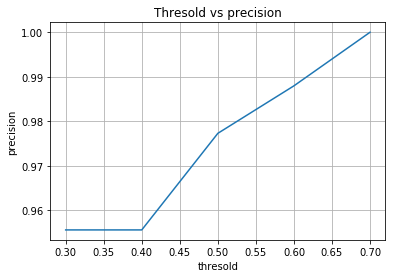

In [27]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(threshold, precision)

plt.xlabel('thresold')
plt.ylabel('precision')
plt.title('Thresold vs precision')
plt.grid(True)

plt.show()

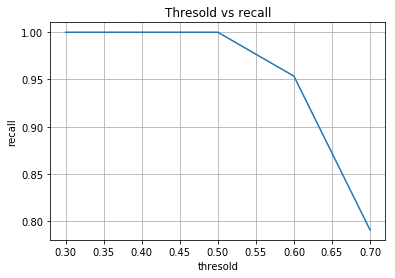

In [29]:
plt.plot(threshold, recall)

plt.xlabel('thresold')
plt.ylabel('recall')
plt.title('Thresold vs recall')
plt.grid(True)

plt.show()